<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/MediasTemporalidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

In [ ]:
pip install mplfinance

In [10]:
import mplfinance as mpf
import pandas as pd
from pandas_datareader import data
from alpha_vantage import timeseries, foreignexchange 
from pylab import *

In [11]:
simbolo1="EUR"
simbolo2="USD"
intervalo=[1,5,15,30,60]

funcion_fx=foreignexchange.ForeignExchange(key="000W9HI05KWAWA7B",output_format="pandas")

datos=[]

for x in range(len(intervalo)):  
  df=funcion_fx.get_currency_exchange_intraday(
      from_symbol=simbolo1, to_symbol=simbolo2, interval=str(intervalo[x])+"min", outputsize='full')[0]
  df.columns=["open","high","low","close"]
  df.sort_values("date",inplace=True)    
  df["media_aritmetica"]=df.close.values.mean()
  df["media20"]=df.close.rolling(20).mean()
  df["media50"]=df.close.rolling(50).mean()
  df["media200"]=df.close.rolling(200).mean()
  df["media1000"]=df.close.rolling(1000).mean()
  datos.append(df)  

In [12]:
def add_title(axes):
    for i, ax in enumerate(axes):
        ax.set_title("%d min" % intervalo[i], fontsize=10,color="white")

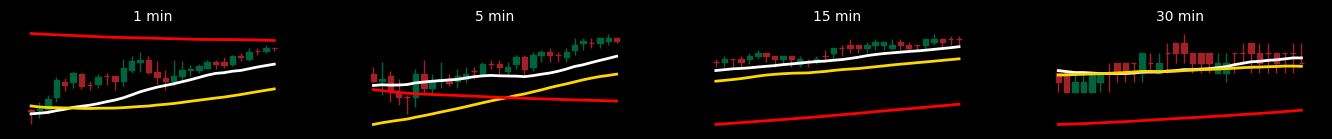

In [20]:
fig_tiempos=mpf.figure(style="charles",figsize=(15,1),facecolor="black",frameon=True)
subplots_adjust(bottom=0.0, right=1, top=1)

ax1=fig_tiempos.add_subplot(1,4,1)
mpf.plot(datos[3][-30:],type="candle",ax=ax1) 
ax1.plot(datos[3][-30:].media20.values,color="white")
ax1.plot(datos[3][-30:].media50.values,color="gold")
ax1.plot(datos[3][-30:].media200.values,color="red")
ax1.set_axis_off()
ax1.grid([])

ax2=fig_tiempos.add_subplot(1,4,2)
mpf.plot(datos[2][-30:],type="candle",ax=ax2)
ax2.plot(datos[2][-30:].media20.values,color="white")
ax2.plot(datos[2][-30:].media50.values,color="gold")
ax2.plot(datos[2][-30:].media200.values,color="red")
ax2.set_axis_off()

ax3=fig_tiempos.add_subplot(1,4,3)
mpf.plot(datos[1][-30:],type="candle",ax=ax3)
ax3.plot(datos[1][-30:].media20.values,color="white")
ax3.plot(datos[1][-30:].media50.values,color="gold")
ax3.plot(datos[1][-30:].media200.values,color="red")
ax3.set_axis_off()

ax4=fig_tiempos.add_subplot(1,4,4)
mpf.plot(datos[0][-30:],type="candle",ax=ax4)
ax4.plot(datos[0][-30:].media20.values,color="white")
ax4.plot(datos[0][-30:].media50.values,color="gold")
ax4.plot(datos[0][-30:].media200.values,color="red")
ax4.set_axis_off()

add_title(fig_tiempos.axes)